In [33]:
#import modules
import networkx as nx #import networks modules
import matplotlib.pyplot as plt #import matplotlib for drawing
import numpy as np #import numpy for mathz

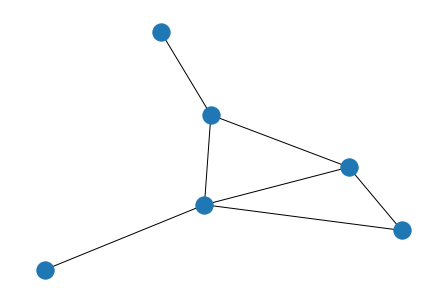

In [12]:
# generate a basic graph
g = nx.Graph()

g.add_edge(1, 2) # Add an edge, note that this also assumes creation of a node
g.add_edge(2, 3)
g.add_edge(1, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(3, 5)
g.add_edge(2, 6)

nx.draw(g) #visualise the graph in a 'random' configuration

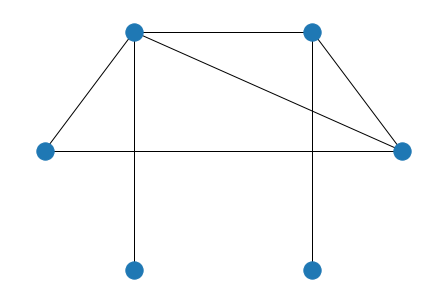

In [13]:
nx.draw_circular(g) # specifying to draw the nodes in a circle

In [52]:
#setup for small world

# adjacent edges function
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v
            
# ring lattice function
def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

# a function to flip
def flip(p):
    return np.random.random() < p

# rewiring function to change each edge over time
def rewire(G, p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)
            nx.draw_circular(G)
            plt.savefig(str(u) + "-" + str(new_v) + "_network.png")
    return G

In [ ]:
# function for node clustering
def node_clustering(G, u):
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan

    possible = k * (k-1) / 2
    exist = 0
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist +=1
    return exist / possible

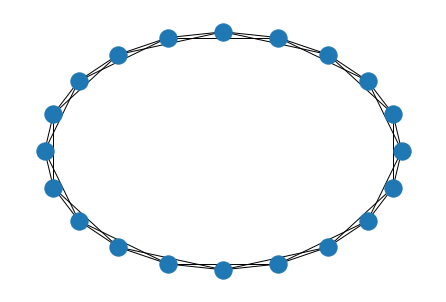

In [55]:
G = make_ring_lattice(20, 4)
nx.draw_circular(G)

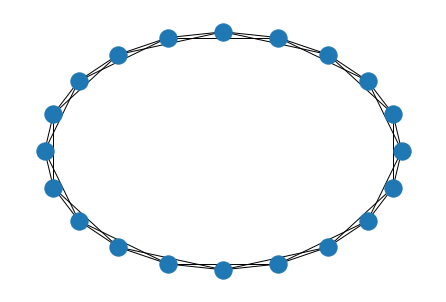

In [45]:
local_g = rewire(G, 0)
nx.draw_circular(local_g)

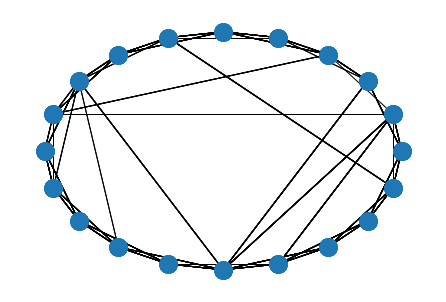

In [56]:
small_g = rewire(G, 0.2)
nx.draw_circular(small_g)

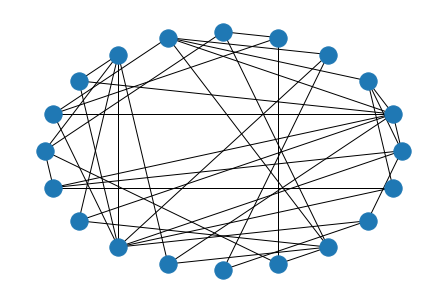

In [47]:
random_g = rewire(G, 1)
nx.draw_circular(random_g)